In [1]:
import psutil
import platform
import numpy as np

print("="*40, "System Information", "="*40)
uname = platform.uname()
print(f"System: {uname.system}")
print(f"Node Name: {uname.node}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")

======================================== System Information ========================================
System: Linux
Node Name: qlm
Release: 4.18.0-305.19.1.el8_4.x86_64
Version: #1 SMP Tue Sep 7 07:07:31 EDT 2021
Machine: x86_64
Processor: x86_64


In [114]:
# let's print CPU information
print("="*40, "CPU Info", "="*40)
# number of cores
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))
# CPU frequencies
cpufreq = psutil.cpu_freq()
print(f"Max Frequency: {cpufreq.max:.2f}Mhz")
print(f"Min Frequency: {cpufreq.min:.2f}Mhz")
print(f"Current Frequency: {cpufreq.current:.2f}Mhz")
# CPU usage
print("CPU Usage Per Core:")
core_usage = np.array(psutil.cpu_percent(percpu=True, interval=1))
non_zero = np.where(core_usage>0)
print(' '.join([f"Core {i}: {percentage}%" for i, percentage in zip(non_zero[0], core_usage[non_zero])]))
print(f"Total CPU Usage: {psutil.cpu_percent()}%")

======================================== CPU Info ========================================
Physical cores: 192
Total cores: 384
Max Frequency: 3900.00Mhz
Min Frequency: 1000.00Mhz
Current Frequency: 1499.42Mhz
CPU Usage Per Core:
Core 0: 1.0% Core 2: 1.0% Core 72: 100.0% Core 144: 17.8% Core 168: 17.0%
Total CPU Usage: 0.3%


In [112]:
List = psutil.cpu_freq(percpu=True)

In [116]:
List[72]

scpufreq(current=3900.0, min=1000.0, max=3900.0)

In [83]:
import scipy

scipy.show_config()

lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]


In [78]:
def get_size(bytes, suffix="B"):
    """
    Scale bytes to its proper format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor

In [95]:
# Memory Information
print("="*40, "Memory Information", "="*40)
# get the memory details
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")
print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}")
print(f"Percentage: {svmem.percent}%")
print("="*20, "SWAP", "="*20)
# get the swap memory details (if exists)
swap = psutil.swap_memory()
print(f"Total: {get_size(swap.total)}")
print(f"Free: {get_size(swap.free)}")
print(f"Used: {get_size(swap.used)}")
print(f"Percentage: {swap.percent}%")

======================================== Memory Information ========================================
Total: 5.90TB
Available: 5.80TB
Used: 85.79GB
Percentage: 1.7%
==================== SWAP ====================
Total: 4.00GB
Free: 4.00GB
Used: 2.42MB
Percentage: 0.1%


In [87]:
import time
Y = []
start = time.time()
end = start
while end - start < 10:
    end = time.time()
    svmem = psutil.virtual_memory()
    Y.append(get_size(svmem.used))
    time.sleep(1)

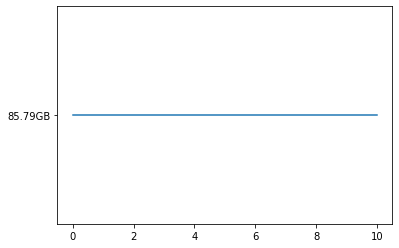

In [88]:
from matplotlib import pyplot as plt
plt.plot(Y)

In [180]:
len(Y)

11994559

In [155]:
import scipy
scipy.show_config()

lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]


In [1]:
import jax

ModuleNotFoundError: No module named 'jax'